In [3]:
import turicreate

In [4]:
tmp = turicreate.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print (tmp)
print (tmp_cubed)

[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


In [5]:
ex_sframe = turicreate.SFrame()
ex_sframe['power_1'] = tmp
print( ex_sframe )

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



In [6]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = turicreate.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [7]:
print (polynomial_sframe(tmp, 4))

+---------+---------+---------+---------+
| power_1 | power_2 | power_3 | power_4 |
+---------+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |   16.0  |
|   3.0   |   9.0   |   27.0  |   81.0  |
+---------+---------+---------+---------+
[3 rows x 4 columns]



In [8]:
sales = turicreate.SFrame('home_data.sframe')

In [9]:
sales = sales.sort(['sqft_living', 'price'])

In [10]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [11]:
model1 = turicreate.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.014023     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [12]:
#let's take a look at the weights before we plot
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.08525145298,4402.689697427734
power_1,None,280.62277088584864,1.9363985551321306


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

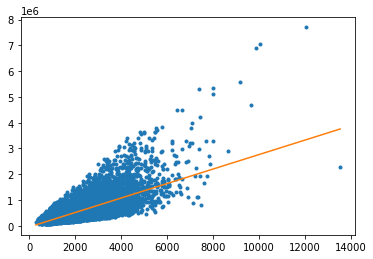

In [14]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

In [15]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.012270     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [16]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.4964446181,7058.004835516453
power_1,None,67.99406406774024,5.28787201316191
power_2,None,0.03858123127891538,0.0008982465470323662


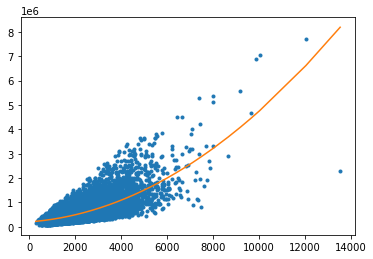

In [17]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

In [18]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
my_features3 = poly3_data.column_names() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = turicreate.linear_regression.create(poly3_data, target = 'price', features = my_features3, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.021227     | 3261066.736007     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [19]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.1179518802,10661.015371319554
power_1,None,-90.1476236119601,10.622289184421506
power_2,None,0.08703671508100237,0.0029663062314838145
power_3,None,-3.839852119599706e-06,2.2417490959005876e-07


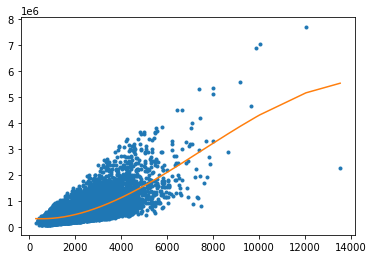

In [20]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

In [21]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features15 = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = turicreate.linear_regression.create(poly15_data, target = 'price', features = my_features15, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.044361     | 2662308.584339     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [22]:
model15.coefficients

name,index,value,stderr
(intercept),None,73619.75208492432,425692.5901395389
power_1,None,410.28746259266694,1985.667355590269
power_2,None,-0.23045071447008592,3.873483280788419
power_3,None,7.588405425789273e-05,0.004172386192710933
power_4,None,-5.657018028046504e-09,2.764105548382603e-06
power_5,None,-4.57028130597624e-13,1.1849596849784023e-09
power_6,None,2.6636020653190584e-17,3.353137065632936e-13
power_7,None,3.3858476930298646e-21,6.235317231351369e-17
power_8,None,1.1472310403747302e-25,7.477909973647464e-21
power_9,None,-4.6529358524593984e-30,6.325367370855489e-25


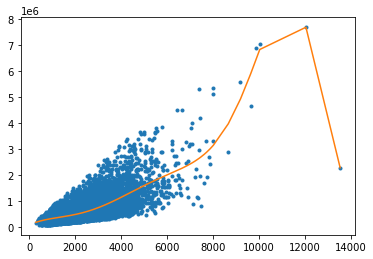

In [23]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')


### Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:

    First split sales into 2 subsets with .random_split(0.5, seed=0).
    Next split the resulting subsets into 2 more subsets each. Use .random_split(0.5, seed=0).

We set seed=0 in these steps so that different users get consistent results. You should end up with 4 subsets (set_1, set_2, set_3, set_4) of approximately equal size.


In [24]:
set_11, set_22 = sales.random_split(0.5, seed=0)
set_1, set_2 = set_11.random_split(0.5, seed=0)
set_3, set_4 = set_22.random_split(0.5, seed=0)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.013812     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    223312.75025024067   |   830108.9460532968    |
|   power_1   |  None |    118.08612758501867   |   3476.5003169541187   |
|   power_2   |  None |   -0.04734820113328519  |   5.899909585600052    |
|   power_3   |  None |  3.2531034246807556e-05 |  0.00528964531842982   |
|   power_4   |  None |  -3.323721525696068e-09 | 2.7137081037783735e-06 |
|   power_5   |  None |  -9.758304575431146e-14 | 7.850089643626329e-10  |
|   power_6   |  None |  1.154403034071346e-17  | 1.1639977877832447e-13 |
|   power_7   |  None |  1.0514586941061925e-21 | 2.874483168861535e-17  |
|   power_8   |  None |  3.4604961638093926e-26 | 8.381898206315824e-21  |
|   power_9   |  None | -1.0965445390702074e-30 | 1.1755355288807577e-24 |
|   power_10  |  None | -

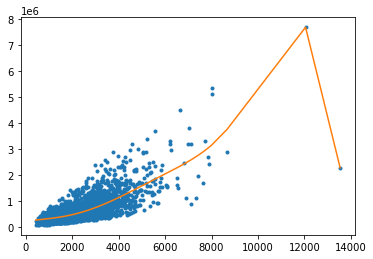

In [26]:
set_1_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features_1 = set_1_data.column_names() # get the name of the features
set_1_data['price'] = set_1['price'] # add price to the data since it's the target
model_1 = turicreate.linear_regression.create(set_1_data, target = 'price', features = my_features_1, validation_set = None)
model_1.coefficients.print_rows(num_rows = 16)
plt.plot(set_1_data['power_1'],set_1_data['price'],'.',set_1_data['power_1'], model_1.predict(set_1_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.038723     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    223312.75025024067   |   830108.9460532968    |
|   power_1   |  None |    118.08612758501867   |   3476.5003169541187   |
|   power_2   |  None |   -0.04734820113328519  |   5.899909585600052    |
|   power_3   |  None |  3.2531034246807556e-05 |  0.00528964531842982   |
|   power_4   |  None |  -3.323721525696068e-09 | 2.7137081037783735e-06 |
|   power_5   |  None |  -9.758304575431146e-14 | 7.850089643626329e-10  |
|   power_6   |  None |  1.154403034071346e-17  | 1.1639977877832447e-13 |
|   power_7   |  None |  1.0514586941061925e-21 | 2.874483168861535e-17  |
|   power_8   |  None |  3.4604961638093926e-26 | 8.381898206315824e-21  |
|   power_9   |  None | -1.0965445390702074e-30 | 1.1755355288807577e-24 |
|   power_10  |  None | -

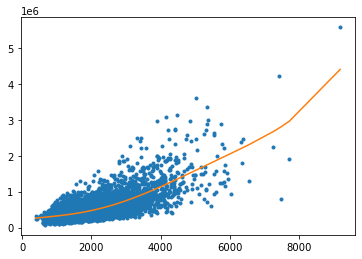

In [28]:
set_2_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features_2 = set_2_data.column_names() # get the name of the features
set_2_data['price'] = set_2['price'] # add price to the data since it's the target
model_2 = turicreate.linear_regression.create(set_1_data, target = 'price', features = my_features_2, validation_set = None)
model_2.coefficients.print_rows(num_rows = 16)
plt.plot(set_2_data['power_1'],set_2_data['price'],'.',set_2_data['power_1'], model_2.predict(set_2_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.037345     | 2269769.506522     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    87317.97955804528    |   2553003.4335862007   |
|   power_1   |  None |    356.30491103764274   |   13651.012110068792   |
|   power_2   |  None |   -0.16481744280273586  |   30.399375968731086   |
|   power_3   |  None |  4.404249926752384e-05  |   0.0373205098680601   |
|   power_4   |  None |   6.48234876409819e-10  | 2.8132512841675242e-05 |
|   power_5   |  None |  -6.752532265686709e-13 | 1.3661393367645473e-08 |
|   power_6   |  None | -3.3684259268232893e-17 | 4.319871880572198e-12  |
|   power_7   |  None |  3.609997042357059e-21  | 8.586577521200054e-16  |
|   power_8   |  None |  6.4699972552415375e-25 | 9.055605256734237e-20  |
|   power_9   |  None |  4.2363938891479043e-29 |          nan           |
|   power_10  |  None | -

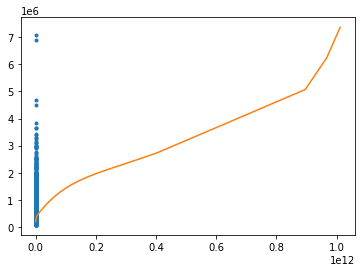

In [29]:
set_3_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features_3 = set_3_data.column_names() # get the name of the features
set_3_data['price'] = set_3['price'] # add price to the data since it's the target
model_3 = turicreate.linear_regression.create(set_3_data, target = 'price', features = my_features_3, validation_set = None)
model_3.coefficients.print_rows(num_rows = 16)
plt.plot(set_3_data['power_1'],set_3_data['price'],'.',set_3_data['power_3'], model_3.predict(set_3_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.017193     | 2314893.173832     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    259020.87943924987   |   1332477.8202677097   |
|   power_1   |  None |   -31.727716170976077   |    8314.07266417908    |
|   power_2   |  None |   0.10970276958898084   |   21.646692079098056   |
|   power_3   |  None |  -1.583838472539176e-05 |  0.03106947233257007   |
|   power_4   |  None | -4.4766062372868035e-09 | 2.7357294341718756e-05 |
|   power_5   |  None |  1.139765734292659e-12  | 1.542887058397474e-08  |
|   power_6   |  None |  1.9766912054732567e-16 |  5.51944707205955e-12  |
|   power_7   |  None |  -6.157836769153566e-21 | 1.0652335414228845e-15 |
|   power_8   |  None |  -4.880123041439314e-24 |          nan           |
|   power_9   |  None |  -6.621867814077207e-28 |          nan           |
|   power_10  |  None |  

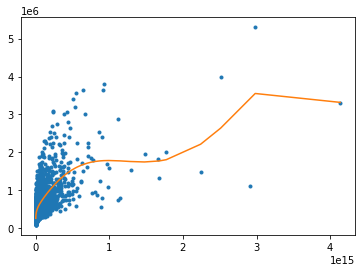

In [30]:
set_4_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features_4 = set_4_data.column_names() # get the name of the features
set_4_data['price'] = set_4['price'] # add price to the data since it's the target
model_4 = turicreate.linear_regression.create(set_4_data, target = 'price', features = my_features_4, validation_set = None)
model_4.coefficients.print_rows(num_rows = 16)
plt.plot(set_4_data['power_4'],set_4_data['price'],'.',set_4_data['power_4'], model_4.predict(set_4_data),'-')

## Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models? NO

## Quiz Question: (True/False) the plotted fitted lines look the same in all four plots False





# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

    Split our sales data into 2 sets: training_and_validation and testing. Use random_split(0.9, seed=1).
    Further split our training data into two sets: training and validation. Use random_split(0.5, seed=1).

Again, we set seed=1 to obtain consistent results for different users.


In [31]:
training_and_validation, testing = sales.random_split(0.9, seed=1)
training, validation = training_and_validation.random_split(0.5, seed=1)



Next you should write a loop that does the following:

    For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
       Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
       hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
       Add train_data['price'] to the polynomial SFrame
       Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
      Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
    Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)


In [33]:
for i in range(1,16):
    poly_data = polynomial_sframe(training['sqft_living'], i)
    my_features = poly_data.column_names() 
    poly_data['price'] = training['price'] # add price to the data since it's the target
    model = turicreate.linear_regression.create(poly_data, target = 'price', features = my_features, 
                                              validation_set = None, verbose = False)
    validation_data = polynomial_sframe(validation['sqft_living'], i)
    validation_data['price'] = validation['price']
    predictions = model.predict(validation_data)
    RSS = ((predictions - validation_data['price']) * (predictions - validation_data['price'])).sum()
    print (RSS)

676709775198048.0
607090530698013.2
616714574532763.2
609129230654382.5
599177138583639.8
589182477809779.8
591717038418299.8
601558237777346.2
612563853987570.5
621744288937777.6
627012012703704.8
627757914767059.1
624738503264322.1
619369705893129.5
613089202412075.8


# Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?  ans- 6

In [34]:
train_data = polynomial_sframe(training['sqft_living'], 6)
train_features = train_data.column_names() # get the name of the features
train_data['price'] = training['price'] # add price to the data since it's the target
model = turicreate.linear_regression.create(train_data, target = 'price', features = train_features, validation_set = None, verbose=False)

test_data = polynomial_sframe(testing['sqft_living'], 6)
test_data['price'] = testing['price'] # add price to the data since it's the target

# First get the predictions
predictions = model.predict(test_data)
# then compute the residuals (since we are squaring it doesn't matter which order you subtract)
residuals = test_data['price'] - predictions
# square the residuals and add them up
residuals_squared = residuals * residuals
RSS = residuals_squared.sum()
print("Degree: %s, Test Data RSS: $%.6f" % (6, RSS))

Degree: 6, Test Data RSS: $125529337848169.656250
